Import all the data needed and merge on state. Also, use the state as an index. Drop the county data and FIPS data which is not needed.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

covid = pd.read_csv('covid_confirmed_usafacts.csv')
population = pd.read_csv('covid_county_population_usafacts.csv')
election = pd.read_csv('npr_election_data.csv')

covid = covid.groupby('State').sum()
population = population.groupby('State').sum()

df_final = covid.merge(population, on = 'State', how= 'outer')
df_final = df_final.merge(election, on= 'State', how = 'outer')
df_final = df_final.set_index('State', drop =True)

column_remove = ['countyFIPS_x', 'stateFIPS', 'countyFIPS_y']
df_final = df_final.drop(column_remove, axis=1)
df_final

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,9/16/2020,9/17/2020,9/18/2020,9/19/2020,9/20/2020,9/21/2020,9/22/2020,population,Clinton Percent,Trump Percent
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,6444,6549,6658,6743,6835,6905,6950,731545,38,53
AL,0,0,0,0,0,0,0,0,0,0,...,141081,141756,142861,144164,144960,145776,146578,4903185,35,63
AR,0,0,0,0,0,0,0,0,0,0,...,72219,73209,74080,75160,75718,76363,76980,3017804,34,60
AZ,0,0,0,0,1,1,1,1,1,1,...,209907,211628,212916,213547,214016,214402,214842,7278717,45,50
CA,0,0,0,0,2,3,3,4,4,4,...,771316,775441,779862,783493,785501,790417,793250,39512223,62,33
CO,0,0,0,0,0,0,0,0,0,0,...,62685,63141,63745,64349,64849,65394,66052,5758736,47,44
CT,0,0,0,0,0,0,0,0,0,0,...,55166,55386,55527,55527,55527,56017,56160,3565287,54,41
DC,0,0,0,0,0,0,0,0,0,0,...,14743,14790,14852,14902,14955,14978,15021,705749,93,4
DE,0,0,0,0,0,0,0,0,0,0,...,19226,19303,19366,19449,19566,19667,19761,973764,53,42


Define the logistic function.

In [4]:
def logistic_curve ( x, β0, β1, β2 ):
    #β0 is the maximum number of cases that will arise long term
    #β1 is a measure of the rate of spread
    #β2 is the time of maximum spread.  
    return β0 / ( 1 + np.exp( β1*(-x+β2) ) )

Create a loop that tests the logistic function against each state.

In [5]:
test_df = []

for i in range(0,51):
    test = df_final.iloc[i, 0:245]
    ys = test
    xs = np.arange(len(ys))
    guessed_betas = [ ys.max(), 1, len(ys)/2 ]
    try:
        found_betas, covariance = curve_fit( logistic_curve, xs, ys, p0=guessed_betas )
        β0, β1, β2 = found_betas
        test_df.append([β0, β1, β2])
    except:
        test_df.append([np.nan, np.nan, np.nan])
test_df


[[8715.221677363073, 0.0383771053144022, 209.93725631505984],
 [163694.2705523109, 0.03756553811494836, 189.1502795039505],
 [84117.05797794025, 0.036137555395686714, 191.64329668085378],
 [211618.910309813, 0.0619550780250359, 167.5684461078041],
 [900090.4671775624, 0.03656566272613934, 186.26757977063394],
 [69266.3176955541, 0.02513543673200412, 159.33089582896812],
 [50217.13258427702, 0.06370908628710327, 99.10331978249253],
 [13633.165769415524, 0.03939449929270649, 120.6938819914991],
 [18563.453244894994, 0.031446907148553443, 138.4775563728378],
 [694106.4016758869, 0.05624328196734653, 179.62214576764808],
 [370965.42086278007, 0.03326212669064927, 192.44613630206894],
 [15085.736296079675, 0.056001295011995716, 219.18658731743292],
 [109334.51472842741, 0.02328518621666829, 205.94340892719916],
 [40107.310704296186, 0.04768182254747835, 191.25406948433437],
 [274902.61460777384, 0.025911513087801197, 155.2536466184324],
 [160138.765561224, 0.02116258322752644, 203.658991851

Append the list into the dataframe, to create our final dataframe with betas. 

In [6]:
b0 = []
b1 = []
b2 = []

for i in test_df:
    b0.append(i[0])
    b1.append(i[1])
    b2.append(i[2])

other_df = pd.DataFrame(
    {'State': df_final.index,
    'β0': b0,
    'β1': b1, 
    'β2': b2 })

beta_frame = df_final.merge(other_df, on = "State", how = 'outer')
beta_frame

,State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,9/19/2020,9/20/2020,9/21/2020,9/22/2020,population,Clinton Percent,Trump Percent,β0,β1,β2
0,AK,0,0,0,0,0,0,0,0,0,...,6743,6835,6905,6950,731545,38,53,8715.221677,0.038377,209.937256
1,AL,0,0,0,0,0,0,0,0,0,...,144164,144960,145776,146578,4903185,35,63,163694.270552,0.037566,189.150280
2,AR,0,0,0,0,0,0,0,0,0,...,75160,75718,76363,76980,3017804,34,60,84117.057978,0.036138,191.643297
3,AZ,0,0,0,0,1,1,1,1,1,...,213547,214016,214402,214842,7278717,45,50,211618.910310,0.061955,167.568446
4,CA,0,0,0,0,2,3,3,4,4,...,783493,785501,790417,793250,39512223,62,33,900090.467178,0.036566,186.267580
5,CO,0,0,0,0,0,0,0,0,0,...,64349,64849,65394,66052,5758736,47,44,69266.317696,0.025135,159.330896
6,CT,0,0,0,0,0,0,0,0,0,...,55527,55527,56017,56160,3565287,54,41,50217.132584,0.063709,99.103320
7,DC,0,0,0,0,0,0,0,0,0,...,14902,14955,14978,15021,705749,93,4,13633.165769,0.039394,120.693882
8,DE,0,0,0,0,0,0,0,0,0,...,19449,19566,19667,19761,973764,53,42,18563.453245,0.031447,138.477556
9,FL,0,0,0,0,0,0,0,0,0,...,681232,683753,685439,687909,21477737,48,49,694106.401676,0.056243,179.622146


In [7]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 8.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


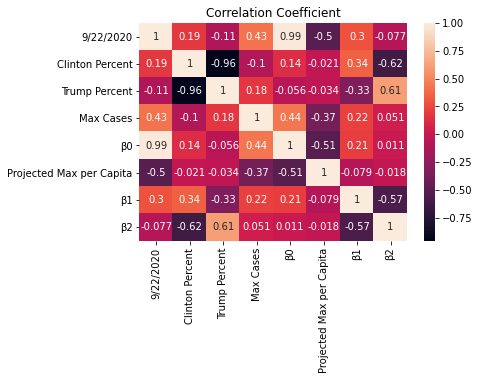

In [8]:
import seaborn as sns

cases_per_capita = beta_frame['9/22/2020'] / beta_frame['population']

beta_frame['Max Cases'] = cases_per_capita
beta_frame ['Projected Max'] = β0

max_per_capita = beta_frame ['Projected Max'] / beta_frame['population']
beta_frame ['Projected Max per Capita'] = max_per_capita

_ = sns.heatmap(beta_frame[['9/22/2020', 'Clinton Percent', 'Trump Percent', 'Max Cases', 'β0', 'Projected Max per Capita', 'β1', 'β2']].corr(), annot=True)
_ = plt.title('Correlation Coefficient')


A.	most recent number of cases
    There is not a significant correlation betweent the most recent number of cases and political affiliation of a state.
B.	most recent number of cases per capita
    There is not a significant correlation between cases per capita and political affiliation of a state. 
C.	projected maximum number of cases
    There is not a significant correlation between max cases and political affiliation of a state. 
D.	projected maximum number of cases per capita
    There is a significant correlation between projected max cases per capita and political affiliation of a state. 
E.	rate of increase
F.	time of maximum increase


Define the hypothesis function, create two subpopulations by state's polictical preference, and test the null hypothesis.

H0 in this 

In [13]:
from scipy import stats

beta_frame_ND_drop = beta_frame.drop(beta_frame.index[28])

trump_state = beta_frame_ND_drop[beta_frame_ND_drop['Trump Percent'] > beta_frame_ND_drop['Clinton Percent']]
clinton_state = beta_frame_ND_drop[beta_frame_ND_drop['Trump Percent'] < beta_frame_ND_drop['Clinton Percent']]

def compare_pop_means ( name1, name2, subpop1, subpop2, column, alpha = 0.05 ):
    mean1 = subpop1[column].mean()
    mean2 = subpop2[column].mean()
    statistic, pvalue = stats.ttest_ind( subpop1[column],
                                         subpop2[column],
                                         equal_var=False )
    reject_H_0 = pvalue < alpha
    print( f'Mean of {name1}: {mean1}' )
    print( f'Mean of {name2}: {mean2}' )
    print( f'Reject H_0 (populations seem different)? {reject_H_0}' )
    return mean1, mean2, reject_H_0, pvalue

compare_pop_means( 'Trump (Republican) State', 'Clinton (State) State', trump_state, clinton_state,
                   'β2' )


Mean of Trump (Republican) State: 198.0939152782528
Mean of Clinton (State) State: 146.4991377956519
Reject H_0 (populations seem different)? True


(198.0939152782528, 146.4991377956519, True, 1.0706107406721816e-05)

We fail to reject the null hypothesis. 

Export to pickle file.

In [10]:
import pickle
beta_frame.to_pickle("dataset_final.pkl")
b= pd.read_pickle("dataset_final.pkl")
b


,State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,9/22/2020,population,Clinton Percent,Trump Percent,β0,β1,β2,Max Cases,Projected Max,Projected Max per Capita
0,AK,0,0,0,0,0,0,0,0,0,...,6950,731545,38,53,8715.221677,0.038377,209.937256,0.009500,6522.551237,0.008916
1,AL,0,0,0,0,0,0,0,0,0,...,146578,4903185,35,63,163694.270552,0.037566,189.150280,0.029894,6522.551237,0.001330
2,AR,0,0,0,0,0,0,0,0,0,...,76980,3017804,34,60,84117.057978,0.036138,191.643297,0.025509,6522.551237,0.002161
3,AZ,0,0,0,0,1,1,1,1,1,...,214842,7278717,45,50,211618.910310,0.061955,167.568446,0.029516,6522.551237,0.000896
4,CA,0,0,0,0,2,3,3,4,4,...,793250,39512223,62,33,900090.467178,0.036566,186.267580,0.020076,6522.551237,0.000165
5,CO,0,0,0,0,0,0,0,0,0,...,66052,5758736,47,44,69266.317696,0.025135,159.330896,0.011470,6522.551237,0.001133
6,CT,0,0,0,0,0,0,0,0,0,...,56160,3565287,54,41,50217.132584,0.063709,99.103320,0.015752,6522.551237,0.001829
7,DC,0,0,0,0,0,0,0,0,0,...,15021,705749,93,4,13633.165769,0.039394,120.693882,0.021284,6522.551237,0.009242
8,DE,0,0,0,0,0,0,0,0,0,...,19761,973764,53,42,18563.453245,0.031447,138.477556,0.020293,6522.551237,0.006698
9,FL,0,0,0,0,0,0,0,0,0,...,687909,21477737,48,49,694106.401676,0.056243,179.622146,0.032029,6522.551237,0.000304
